# missing values 

In [1]:
import os 
os.chdir(r"C:\Users\venuk\OneDrive\Desktop\imarticus")
os.getcwd()

'C:\\Users\\venuk\\OneDrive\\Desktop\\imarticus'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
my_data=pd.read_excel("banglore_filter.xlsx")

In [7]:
my_data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,2020-12-19 00:00:00,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,NaN,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
114,Built-up Area,Ready To Move,Ramamurthy Nagar,4 Bedroom,NaN,3700.0,4.0,1.0,225.00
115,Built-up Area,Ready To Move,Sarjapur Road,3 Bedroom,Cetattu,2497.0,3.0,2.0,140.00
116,Super built-up Area,Ready To Move,Kengeri,3 BHK,Vaens G,1540.0,2.0,3.0,64.00
117,Super built-up Area,2020-12-18 00:00:00,Thanisandra,3 BHK,NaN,1436.0,3.0,1.0,74.75


In [8]:
my_data.isna().sum()

area_type        0
availability     0
location         0
size             0
society         49
total_sqft       2
bath             4
balcony          8
price            0
dtype: int64

In [9]:
#more na values dropping the column
my_data=my_data.drop("society",1)

In [10]:
my_data

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,2020-12-19 00:00:00,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,NaN,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
114,Built-up Area,Ready To Move,Ramamurthy Nagar,4 Bedroom,3700.0,4.0,1.0,225.00
115,Built-up Area,Ready To Move,Sarjapur Road,3 Bedroom,2497.0,3.0,2.0,140.00
116,Super built-up Area,Ready To Move,Kengeri,3 BHK,1540.0,2.0,3.0,64.00
117,Super built-up Area,2020-12-18 00:00:00,Thanisandra,3 BHK,1436.0,3.0,1.0,74.75


(array([19., 54., 22.,  7., 10.,  1.,  1.,  2.,  0.,  1.]),
 array([ 460.,  984., 1508., 2032., 2556., 3080., 3604., 4128., 4652.,
        5176., 5700.]),
 <a list of 10 Patch objects>)

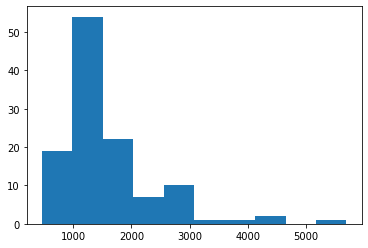

In [11]:
plt.hist(my_data["total_sqft"])

In [13]:
my_data["total_sqft"].median()            ##skewed data   so replace with median

1310.0

In [14]:
my_data["total_sqft"].fillna(1310, inplace = True)

In [15]:
my_data["total_sqft"].isna().sum()

0

In [17]:
my_data["bath"].mode()      # this is discrete data so replace with mode


0    2.0
dtype: float64

In [19]:
my_data["bath"].fillna(2, inplace = True)

In [20]:
my_data["bath"].isna().sum()

0

In [21]:
my_data["balcony"].mode()

0    2.0
dtype: float64

In [22]:
my_data["balcony"].fillna(2, inplace = True)

In [23]:
my_data["balcony"].isna().sum()

0

In [24]:
my_data.isna().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

# Fill NA Forward and Backward

In [25]:
my_data=pd.read_excel("banglore_filter.xlsx")

In [26]:
my_data.isna().sum()

area_type        0
availability     0
location         0
size             0
society         49
total_sqft       2
bath             4
balcony          8
price            0
dtype: int64

In [27]:
my_data["bath"].fillna(method='pad')     ##if 2nd obs is na then 1st observation value is filled

0      2.0
1      5.0
2      2.0
3      2.0
4      2.0
      ... 
114    4.0
115    3.0
116    2.0
117    3.0
118    2.0
Name: bath, Length: 119, dtype: float64

In [28]:
my_data["balcony"].fillna(method='backfill')    #if second obs is na then 3rd obs value is filled

0      1.0
1      3.0
2      3.0
3      1.0
4      1.0
      ... 
114    1.0
115    2.0
116    3.0
117    1.0
118    2.0
Name: balcony, Length: 119, dtype: float64